In [3]:
import os
import itertools, collections
import numpy, scipy, pandas
import scipy.signal
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from imp import reload
import seaborn

from pgtools import toolbox, myplots
import pygbrowse

import empdist
import peas

In [4]:
test_vec = numpy.arange(10)
numpy.random.seed(1)
numpy.random.shuffle(test_vec)
print(test_vec, test_vec.sum(), test_vec.mean(), test_vec.min(), test_vec.max())

[2 9 6 4 0 3 1 7 8 5] 45 4.5 0 9


### Sum

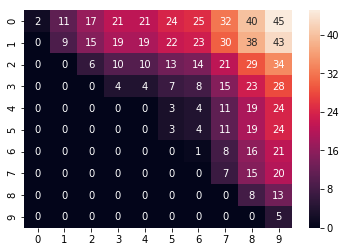

In [5]:
seaborn.heatmap(scoring.compute_sum_table_1d(test_vec), annot=True)

### Mean

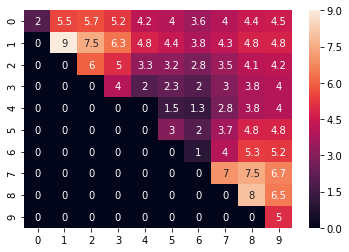

In [6]:
seaborn.heatmap(scoring.compute_mean_table_1d(test_vec), annot=True)

### Min

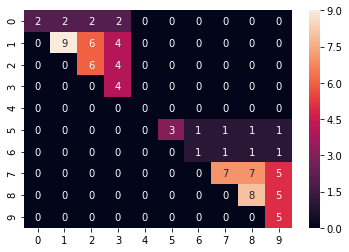

In [7]:
seaborn.heatmap(scoring.compute_min_table_1d(test_vec), annot=True)

### Max

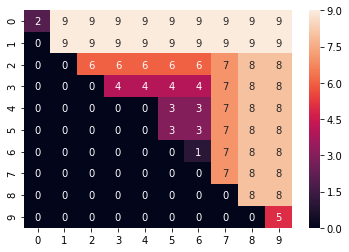

In [8]:
seaborn.heatmap(scoring.compute_max_table_1d(test_vec), annot=True)

## Matrices

193.0 12.866666666666667 1.0 24.0


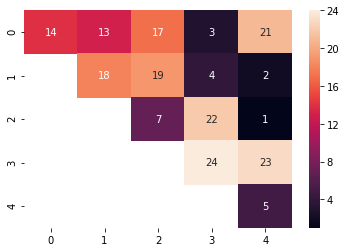

In [14]:
reload(scoring)
test_matrix = numpy.arange(25).astype(float)
numpy.random.seed(1)
numpy.random.shuffle(test_matrix)
test_matrix = test_matrix.reshape((5,5))
test_matrix[numpy.tril_indices(5,-1)] = numpy.NaN
print(test_matrix[numpy.triu_indices(5,0)].sum(), test_matrix[numpy.triu_indices(5,0)].mean(), test_matrix[numpy.triu_indices(5,0)].min(), test_matrix[numpy.triu_indices(5,0)].max())
seaborn.heatmap(test_matrix, annot=True)

### Sum

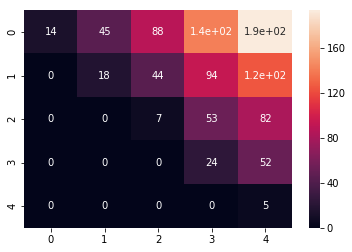

In [15]:
seaborn.heatmap(scoring.compute_sum_table_2d(test_matrix, 0), annot=True)

### Mean

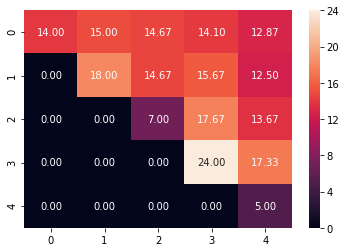

In [16]:
reload(scoring)
seaborn.heatmap(scoring.compute_mean_table_2d(test_matrix), annot=True, fmt=':>0.2f')

### Min

In [17]:
def compute_min_table_2d(data, start_diagonal=0, end_diagonal=0):
    """
    Returns an upper-triangular matrix where each cell contains the sum of a square
    subset of :param:`data`centered on the diagonal with a corner in that cell, excluding
    the diagonal itself.

    Uses implicit recursion to do this efficiently.
    """
    assert data.shape[0] == data.shape[1]
    n = data.shape[0]
    assert n > 0
    assert n >= end_diagonal

    if end_diagonal == 0:
        end_diagonal = n

    assert end_diagonal > start_diagonal

    min_table = numpy.zeros((n, n))

    # Initialize: copy over the 1st diagonal
    d1_idx = my_diag_indices(n, start_diagonal)
    min_table[d1_idx] = data[d1_idx]
    if end_diagonal - start_diagonal >= 2:
        for diagonal_idx in range(start_diagonal + 1, end_diagonal):
            dk_idx = my_diag_indices(n, diagonal_idx)
            dk_prev = my_diag_indices(n, diagonal_idx - 1)

            min_table[dk_idx] = numpy.minimum(data[dk_idx], numpy.minimum(min_table[truncate_array_tuple(dk_prev, 1, 0)],
                                                                          min_table[truncate_array_tuple(dk_prev, 0, 1)]))
    return min_table

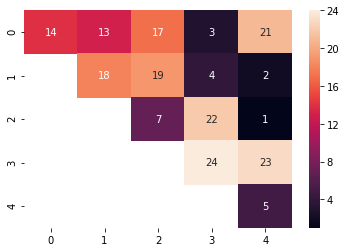

In [18]:
seaborn.heatmap(test_matrix, annot=True)

## Min

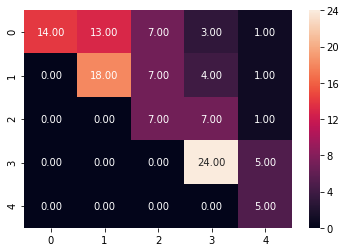

In [19]:
reload(scoring)
seaborn.heatmap(scoring.compute_min_table_2d(test_matrix, 0), annot=True, fmt=':>0.2f')

### Max

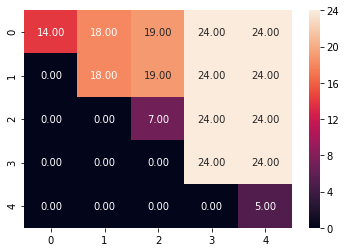

In [23]:
reload(scoring)
seaborn.heatmap(scoring.compute_max_table_2d(test_matrix, 0), annot=True, fmt=':>0.2f')